# Iris Flowers


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score
plt.style.use('seaborn')

In [2]:
acc_dict={}
f1_dict={}
df=pd.read_csv("iris.csv")
df.index=df.index+1
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


# Plotting

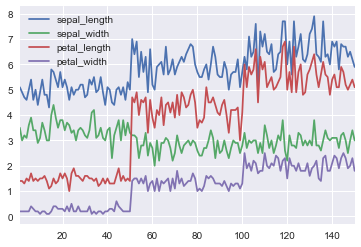

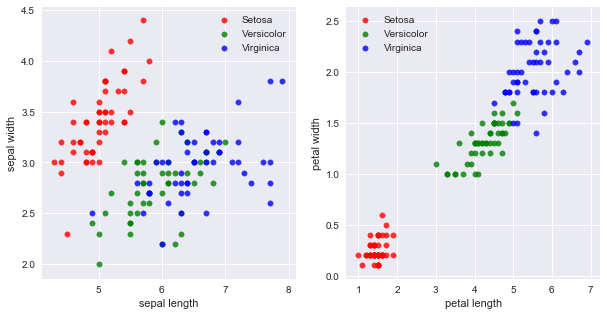

In [4]:
df.plot()

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

seto=df.where(df['species']=='setosa')
versi=df.where(df['species']=='versicolor')
vir=df.where(df['species']=='virginica')

ax1.scatter(seto['sepal_length'],seto['sepal_width'],c='r',label='Setosa',alpha=0.8,s=30)
ax1.scatter(versi['sepal_length'],versi['sepal_width'],c='g',label='Versicolor',alpha=0.8,s=30)
ax1.scatter(vir['sepal_length'],vir['sepal_width'],c='b',label='Virginica',alpha=0.8,s=30)
ax1.set_xlabel('sepal length')
ax1.set_ylabel('sepal width')
ax1.legend()


ax2.scatter(seto['petal_length'],seto['petal_width'],c='r',label='Setosa',alpha=0.8,s=30)
ax2.scatter(versi['petal_length'],versi['petal_width'],c='g',label='Versicolor',alpha=0.8,s=30)
ax2.scatter(vir['petal_length'],vir['petal_width'],c='b',label='Virginica',alpha=0.8,s=30)
ax2.set_xlabel('petal length')
ax2.set_ylabel('petal width')
ax2.legend()
plt.show()


# Train & Test

In [5]:
cols=df.columns
X=df[cols[:-1]]
y=df[cols[-1]]

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0) #use random_state=0 parameter if needed to reproduce
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
62,5.9,3.0,4.2,1.5
93,5.8,2.6,4.0,1.2
113,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
142,6.9,3.1,5.1,2.3


# Scaling

In [6]:
X_train2=MinMaxScaler().fit_transform(X_train)
X_test2=MinMaxScaler().fit_transform(X_test)

# Naive Bayes

In [7]:
from sklearn.naive_bayes import MultinomialNB

In [17]:
def mnb():
    mnb=MultinomialNB().fit(X_train,y_train)
    y_pred = mnb.predict(X_train)
    y_pred2= mnb.predict(X_test)
    
    s1 = accuracy_score(y_train, y_pred)
    s2 = f1_score(y_train, y_pred, average='macro')
    s3 = accuracy_score(y_test, y_pred2)
    s4 = f1_score(y_test, y_pred2, average='macro')
    
    acc_dict['Naive Bayes']=s3
    f1_dict['Naive Bayes']=s4
    return pd.DataFrame([[s1,s2],[s3,s4]], index=['Train','Test'], columns=['Accuracy', 'f1'])
    
mnb()

D:\Program Files\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,Accuracy,f1
Train,0.705357,0.590062
Test,0.578947,0.509804


# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

Using non scaled dataset

In [20]:
def lr1():
    lr=LogisticRegression(C=1, solver='lbfgs', multi_class='auto', ).fit(X_train, y_train)
    y_pred = lr.predict(X_train)
    y_pred2= lr.predict(X_test)
    
    s1 = accuracy_score(y_train, y_pred)
    s2 = f1_score(y_train, y_pred, average='macro')
    s3 = accuracy_score(y_test, y_pred2)
    s4 = f1_score(y_test, y_pred2, average='macro')
    
    acc_dict['Logistic Regression']= s3
    f1_dict['Logistic Regression']= s4
    return pd.DataFrame([[s1,s2],[s3,s4]], index=['Train','Test'], columns=['Accuracy', 'f1'])
    
lr1()

,Accuracy,f1
Train,0.982143,0.981962
Test,0.973684,0.971703


Using scaled datasets

In [23]:
def lr2():
    lr=LogisticRegression(C=100, solver='lbfgs', multi_class='auto').fit(X_train2, y_train)
    y_pred = lr.predict(X_train2)
    y_pred2= lr.predict(X_test2)
    
    s1 = accuracy_score(y_train, y_pred)
    s2 = f1_score(y_train, y_pred, average='macro')
    s3 = accuracy_score(y_test, y_pred2)
    s4 = f1_score(y_test, y_pred2, average='macro')
    
    acc_dict['Logistic Regression (scaled)']= s3
    f1_dict['Logistic Regression (scaled)']= s4
    return pd.DataFrame([[s1,s2],[s3,s4]], index=['Train','Test'], columns=['Accuracy', 'f1'])

lr2()

,Accuracy,f1
Train,0.982143,0.982066
Test,0.973684,0.971703


# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

No need of scaling here

In [26]:
def dtr():
    dt=DecisionTreeClassifier().fit(X_train,y_train)
    y_pred = dt.predict(X_train)
    y_pred2= dt.predict(X_test)
    
    s1 = accuracy_score(y_train, y_pred)
    s2 = f1_score(y_train, y_pred, average='macro')
    s3 = accuracy_score(y_test, y_pred2)
    s4 = f1_score(y_test, y_pred2, average='macro')
    
    acc_dict['Decision Tree']= s3
    f1_dict['Decision Tree']= s4
    return pd.DataFrame([[s1,s2],[s3,s4]], index=['Train','Test'], columns=['Accuracy', 'f1'])

dtr()

,Accuracy,f1
Train,1.000000,1.000000
Test,0.973684,0.971703


# Support Vector Machine

In [29]:
from sklearn.svm import SVC

Using non scaled dataset

In [30]:
def sv1():
    sv=SVC(C=3,kernel='rbf',gamma='scale').fit(X_train,y_train)
    y_pred = sv.predict(X_train)
    y_pred2= sv.predict(X_test)
    
    s1 = accuracy_score(y_train, y_pred)
    s2 = f1_score(y_train, y_pred, average='macro')
    s3 = accuracy_score(y_test, y_pred2)
    s4 = f1_score(y_test, y_pred2, average='macro')
    
    acc_dict['SVM']= s3
    f1_dict['SVM']= s4
    return pd.DataFrame([[s1,s2],[s3,s4]], index=['Train','Test'], columns=['Accuracy', 'f1'])
sv1()

,Accuracy,f1
Train,0.973214,0.972851
Test,0.973684,0.971703


Using scaled dataset

In [31]:
def sv2():
    sv=SVC(C=0.7,kernel='rbf',gamma='scale').fit(X_train2,y_train)
    y_pred = sv.predict(X_train2)
    y_pred2= sv.predict(X_test2)
    
    s1 = accuracy_score(y_train, y_pred)
    s2 = f1_score(y_train, y_pred, average='macro')
    s3 = accuracy_score(y_test, y_pred2)
    s4 = f1_score(y_test, y_pred2, average='macro')
    
    acc_dict['SVM (scaled)']= s3
    f1_dict['SVM (scaled)']= s4
    return pd.DataFrame([[s1,s2],[s3,s4]], index=['Train','Test'], columns=['Accuracy', 'f1'])
sv2()

,Accuracy,f1
Train,0.973214,0.973026
Test,0.973684,0.971703


# k Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier

Using non scaled datasets

In [41]:
def kn1():
    knn=KNeighborsClassifier(n_neighbors=16).fit(X_train,y_train)

    y_pred = knn.predict(X_train)
    y_pred2= knn.predict(X_test)
    
    s1 = accuracy_score(y_train, y_pred)
    s2 = f1_score(y_train, y_pred, average='macro')
    s3 = accuracy_score(y_test, y_pred2)
    s4 = f1_score(y_test, y_pred2, average='macro')
    
    acc_dict['kNN']= s3
    f1_dict['kNN']= s4
    return pd.DataFrame([[s1,s2],[s3,s4]], index=['Train','Test'], columns=['Accuracy', 'f1'])
kn1()

,Accuracy,f1
Train,0.964286,0.963925
Test,0.973684,0.971703


Using scaled datasets

In [35]:
def kn2():
    knn=KNeighborsClassifier(n_neighbors=16).fit(X_train2,y_train)

    y_pred = knn.predict(X_train2)
    y_pred2= knn.predict(X_test2)
    
    s1 = accuracy_score(y_train, y_pred)
    s2 = f1_score(y_train, y_pred, average='macro')
    s3 = accuracy_score(y_test, y_pred2)
    s4 = f1_score(y_test, y_pred2, average='macro')
    
    acc_dict['kNN (scaled)']= s3
    f1_dict['kNN (scaled)']= s4
    return pd.DataFrame([[s1,s2],[s3,s4]], index=['Train','Test'], columns=['Accuracy', 'f1'])
kn2()

,Accuracy,f1
Train,0.946429,0.946198
Test,0.973684,0.971703


# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
def ran():
    rf=RandomForestClassifier(random_state=0).fit(X_train,y_train)
    y_pred = rf.predict(X_train)
    y_pred2= rf.predict(X_test)
    
    s1 = accuracy_score(y_train, y_pred)
    s2 = f1_score(y_train, y_pred, average='macro')
    s3 = accuracy_score(y_test, y_pred2)
    s4 = f1_score(y_test, y_pred2, average='macro')
    
    acc_dict['Random Forest']= s3
    f1_dict['Random Forest']= s4
    return pd.DataFrame([[s1,s2],[s3,s4]], index=['Train','Test'], columns=['Accuracy', 'f1'])
ran()

D:\Program Files\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Accuracy,f1
Train,1.000000,1.000000
Test,0.973684,0.971703


# Neural Network

In [39]:
from sklearn.neural_network import MLPClassifier

Using unscaled datasets

In [42]:
def mlp():
    nn= MLPClassifier(hidden_layer_sizes=(10,10), solver='adam', random_state=0, alpha=0.1, max_iter=1000).fit(X_train, y_train)
    y_pred = nn.predict(X_train)
    y_pred2= nn.predict(X_test)
    
    s1 = accuracy_score(y_train, y_pred)
    s2 = f1_score(y_train, y_pred, average='macro')
    s3 = accuracy_score(y_test, y_pred2)
    s4 = f1_score(y_test, y_pred2, average='macro')
    
    acc_dict['Neural Network']= s3
    f1_dict['Neural Network']= s4
    return pd.DataFrame([[s1,s2],[s3,s4]], index=['Train','Test'], columns=['Accuracy', 'f1'])
mlp()

,Accuracy,f1
Train,0.982143,0.981962
Test,0.973684,0.971703


Using Scaled datasets

In [44]:
def mlp2():
    nn= MLPClassifier(hidden_layer_sizes=(10,10), solver='adam', random_state=0, alpha=0.1, max_iter=1000).fit(X_train2, y_train)
    y_pred = nn.predict(X_train2)
    y_pred2= nn.predict(X_test2)
    
    s1 = accuracy_score(y_train, y_pred)
    s2 = f1_score(y_train, y_pred, average='macro')
    s3 = accuracy_score(y_test, y_pred2)
    s4 = f1_score(y_test, y_pred2, average='macro')
    
    acc_dict['Neural Network (scaled)']= s3
    f1_dict['Neural Network (scaled)']= s4
    return pd.DataFrame([[s1,s2],[s3,s4]], index=['Train','Test'], columns=['Accuracy', 'f1'])
mlp2()

,Accuracy,f1
Train,0.973214,0.973026
Test,0.973684,0.971703


# Score Graph


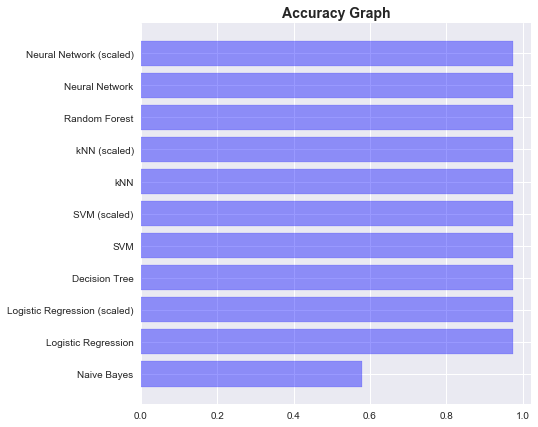

In [54]:
plt.figure(figsize=(7,7))
plt.barh(range(len(acc_dict)), list(acc_dict.values()), align='center',color='blue',alpha=0.4,edgecolor='blue')
plt.yticks(range(len(acc_dict)), list(acc_dict.keys()))
plt.title('Accuracy Graph on Test', fontweight='bold', fontsize=14)
plt.show()

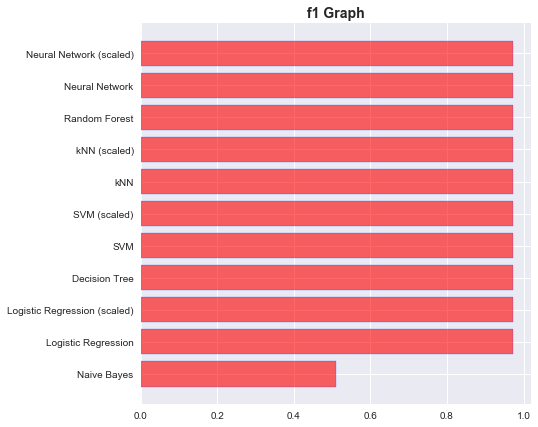

In [53]:
plt.figure(figsize=(7,7))
plt.barh(range(len(f1_dict)), list(f1_dict.values()), align='center',color='red',alpha=0.6,edgecolor='blue')
plt.yticks(range(len(f1_dict)), list(f1_dict.keys()))
plt.title('f1 Graph', fontweight='bold', fontsize=14)
plt.show()

In [49]:
print("Accuracy on test:")
for i in acc_dict.keys():
    print('{0:30} | {1:20}'.format(i,acc_dict[i]))

Accuracy on test:
Naive Bayes                    |   0.5789473684210527
Logistic Regression            |   0.9736842105263158
Logistic Regression (scaled)   |   0.9736842105263158
Decision Tree                  |   0.9736842105263158
SVM                            |   0.9736842105263158
SVM (scaled)                   |   0.9736842105263158
kNN                            |   0.9736842105263158
kNN (scaled)                   |   0.9736842105263158
Random Forest                  |   0.9736842105263158
Neural Network                 |   0.9736842105263158
Neural Network (scaled)        |   0.9736842105263158


In [50]:
print("f1 on test:")
for i in f1_dict.keys():
    print('{0:30} | {1:20}'.format(i,f1_dict[i]))

f1 on test:
Naive Bayes                    |   0.5098039215686274
Logistic Regression            |   0.9717034521788342
Logistic Regression (scaled)   |   0.9717034521788342
Decision Tree                  |   0.9717034521788342
SVM                            |   0.9717034521788342
SVM (scaled)                   |   0.9717034521788342
kNN                            |   0.9717034521788342
kNN (scaled)                   |   0.9717034521788342
Random Forest                  |   0.9717034521788342
Neural Network                 |   0.9717034521788342
Neural Network (scaled)        |   0.9717034521788342
